## DNA sequencing
### Lecture 2 example (unfilled)

During Lecture 2, we also saw the DNA sequencing problem as a **Hamiltonian** path problem. Let's try to resolve the same problem using this formulation now!

In [2]:
subsequences = ['CAT' , 'ATT' , 'ATG', 'TAT' , 'TTG', 'TGC', 'TGT' , 'GTA']

Once again, we write a code that produces the graph (as discussed in class for the Hamiltonian problem now).

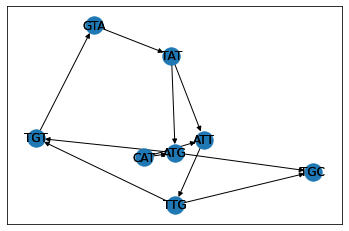

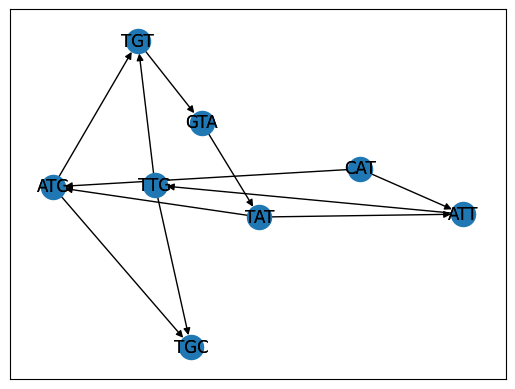

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def construct_graph_from(sub):
    G = nx.DiGraph()
    G.add_nodes_from(sub)
    for (i,j) in  combinations(G.nodes(),2):
        # print(i[1:3])
        if i[1:3]==j[0:2]:
            G.add_edge(i,j)
        if j[1:3]==i[0:2]:
            G.add_edge(j,i)
    #################
    ### Fill this ###
    ################# 
    
    return G

G = construct_graph_from(subsequences) 
pos=nx.spring_layout(G) ## <- We can change this to other types of layouts, try some out yourselves
nx.draw_networkx(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()


Now, we write a code to find a **Hamiltonian path**. Networkx has a function *hamiltonian_path(graph)* that we would love to use. However, it only applies to a very spcific set of graphs: [tournament graphs](https://en.wikipedia.org/wiki/Tournament_%28graph_theory%29). Is our graph a tournament graph?

In [16]:
from networkx.algorithms import tournament
tournament.is_tournament(G)

False

Turns out it is not.. So, attempt \#2? Let's try to write our own code to find a Hamiltonian path. One surefire way of solving it is brute force. Slow, but it will work for sure. What should we do? 

For one, we need to create all permutations of the nodes. 

In [34]:
from itertools import permutations
allPermutations=list(permutations(G.nodes()))
print(allPermutations[0])
for i in range(len(allPermutations[0])):
    print(i)
# print(G.neighbors("CAT"))

('CAT', 'ATT', 'ATG', 'TAT', 'TTG', 'TGC', 'TGT', 'GTA')
0
1
2
3
4
5
6
7


Then, we need to check if a permutation is a valid Hamiltonian path -- i.e., are all two sequential elements connected by an edge?

In [35]:
def isValid(perm):
    for i in range(len(perm)):
        j=i+1
        if j < len(perm):
            if G.has_edge(perm[i],perm[j]):
                i=j
            else:
                return False
    #################
    ### Fill this ###
    ################# 
    return True

Finally, enumerate all permutations to see if they are a valid path. If so, return it!

In [44]:
# len(allPermutations)
# for i in allPermutations:
#     print(isValid(i)) 

# allPermutations[1302]

In [40]:
for i in allPermutations:
    if isValid(i):
        print(i)
        break
path=i

('CAT', 'ATT', 'TTG', 'TGT', 'GTA', 'TAT', 'ATG', 'TGC')


In [37]:
#print(path)
DNA=[path[0]]
for i in range(1,len(path)):
    DNA.append(str(path[i][2]))
print(''.join(DNA))

CATTGTATGC
